<a href="https://colab.research.google.com/github/carlos-alves-one/-ML-Zoomcamp-HW-2/blob/main/ML_Zoomcamp_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning ZoomCamp - Homework 2 
**Author.....: Carlos Manuel de Oliveira Alves**<br>
**Created...: 16/09/2022**

In [61]:
# Import all necessay libraries that we will use in this homework
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Using this library it reduces some minor warnings
# e.g. not having the newest version of numpy and python it will give the warning
# using the parameter ignore it will ignore the warnings
import warnings
warnings.filterwarnings("ignore")

##Load Data

In [62]:
# Create list with the columns to be used with the dataset
usecols = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

# Getting the data for the homework
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-18 11:25:54--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.2’

housing.csv.2       100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2022-09-18 11:25:54 (19.8 MB/s) - ‘housing.csv.2’ saved [1423529/1423529]



In [63]:
# Store only the features we need for this homework
data = pd.read_csv('housing.csv', usecols=usecols)

In [64]:
# Check total of rows and columns of the dataset
print(data.shape)

(20640, 9)


In [65]:
# Check the first 10 rows of the dataset
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


###Look at the median_house_value variable. Does it have a long tail? False

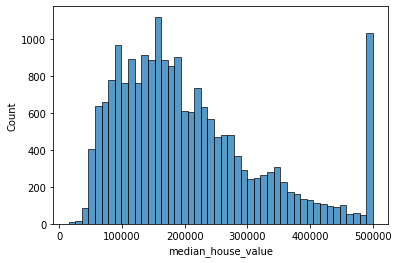

In [66]:
# Plot the histogram of median_house_value
sns.histplot(data.median_house_value)

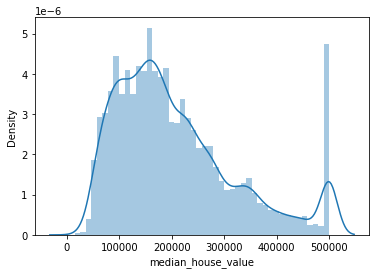

In [67]:
# Another way using the distribution plot with median_house_value
sns.distplot(data.median_house_value)

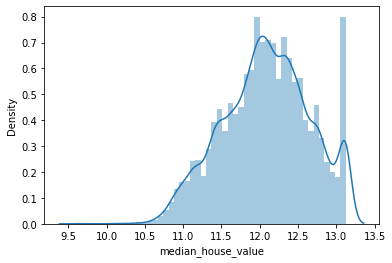

In [68]:
# Different view of the plot when applying the log transformation
sns.distplot(np.log1p(data.median_house_value))

##Question 1

**Find a feature with missing values. How many missing values does it have?**

In [69]:
# Use the function info to get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [70]:
# We have a feature called total_bedrooms has missing values

missingValues = data.isnull().sum()
missingValues

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

###Answer for Question N.1: 'total_bedrooms', 207

In [71]:
# Different method to find the missing values of the datset
incomplete = data.isna().mean()*100
print(incomplete[incomplete > 0])

# in this case the percentage of the missing values is 1%

total_bedrooms    1.002907
dtype: float64


In [72]:
# Another method to find the missing values of the datset
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

##Question 2

**What's the median (50% percentile) for variable 'population'?**

In [73]:
medianPopulation = data['population'].median()
medianPopulation

1166.0

###Answer for Question N.2: 1166

In [74]:
# Another way to find the median for variable 'population'
data['population'].describe(percentiles=[.5]).T

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
50%       1166.000000
max      35682.000000
Name: population, dtype: float64

In [75]:
# Final way to find the median for variable 'population'
np.median(data['population'])

1166.0

In [76]:
# Descriptive statistic of the dataset
data.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-124.3500,-122.2900,-121.8000,-118.4900,-118.01000,-117.25000,-117.080000,-116.29000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,32.5400,33.6300,33.9300,34.2600,37.71000,38.48000,38.960000,40.62610,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,1.0000,13.0000,18.0000,29.0000,37.00000,46.00000,52.000000,52.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,2.0000,941.0000,1447.7500,2127.0000,3148.00000,4651.50000,6213.200000,11212.11000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,1.0000,198.0000,296.0000,435.0000,647.00000,965.00000,1275.400000,2221.36000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,3.0000,510.0000,787.0000,1166.0000,1725.00000,2566.00000,3288.000000,5805.83000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,1.0000,184.0000,280.0000,409.0000,605.00000,890.00000,1162.000000,1982.66000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,0.4999,1.9038,2.5634,3.5348,4.74325,6.15921,7.300305,10.59654,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,14999.0000,82300.0000,119600.0000,179700.0000,264725.00000,376600.00000,489810.000000,500001.00000,500001.0000


##Split the data

In [77]:
# Define the function training linear regression
def train_linear_regression(X, y):

  # Create a vector with ones to add the array X
  ones = np.ones(X.shape[0])

  # Stack the vector of ones with the matrix
  X = np.column_stack([ones, X])

  # Implement the the gram matrix
  XTX = X.T.dot(X)

  # Find the inverse of the matrix
  XTX_inv = np.linalg.inv(XTX)

  # Multiply with x transpose and then multiply it with y
  w_full = XTX_inv.dot(X.T).dot(y)

  # return the result: first element of the tuple is the bias term
  # the rest is the weights
  return w_full[0], w_full[1:]

In [78]:
# Dataset Preparation

# Store the length of the dataset
n = len(data)

# Define the size of the datasets: validation, test and train
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
n_val   = int(0.2*n)
n_test  = int(0.2*n)
n_train = n - (n_val+n_test)

# Shuffle the initial dataset, use seed 42.
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# Store the data shuffled in a new dataframe
df_shuffled = data.iloc[idx]

# Make a copy of the datasets with the new index
df_train = df_shuffled.iloc[:n_train].copy()
df_val   = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test  = df_shuffled.iloc[n_train+n_val:].copy()

# Reset the indexes of all datasets
df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)


In [79]:
# Prepare the target featues for all datsets: train, validation and test
# Apply the log transformation to the median_house_value variable using the np.log1p() function.
y_train = np.log1p(df_train.median_house_value.values)
y_val   = np.log1p(df_val.median_house_value.values)
y_test  = np.log1p(df_test.median_house_value.values)

In [80]:
# Make sure that the target value ('median_house_value') is not in your dataframe.
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

##Question 3



In [81]:
# Create list with the columns to be checked with the dataset
check = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
]

# Declare function prepare X to fill the missing values
def prepare_X(df, fillna_value):

  # Create dataframe with columns from the chek list
  df_num = df[check]
  
  # Filling the missing values of the dataframe
  df_num = df_num.fillna(fillna_value)
  
  # Extracting the feature matrix, the numpy array
  X = df_num.values
  
  # Return the numpy array X
  return X

In [82]:
# Define a function for RMSE using the y values and y prediction
def rmse(y, y_pred):

  # Store the error the difference between y and y prediction
  error = y - y_pred 

  # Squared error value
  se = error ** 2

  # Store the mean (average) square error
  mse = se.mean()

  # Return the square root of mean square error
  return np.sqrt(mse)

In [83]:
# We need to deal with missing values for the column from Q1.

# We have two options: fill it with 0 or with the mean of this variable.
# Try both options. For each, train a linear regression model without regularization using the code from the lessons.

# For computing the mean, use the training only!

# Calculate the mean of the columntotal_bedrooms with train dataset
mean = df_train.total_bedrooms.mean()

# Fill the missing values with the mean for the train dataset
X_mean_train = prepare_X(df_train, fillna_value=mean)

# Receive the intercept for our mean solution (w_0_mean) and our slope coefficients (w_mean)
# by applying train linear regression function on our x and y train sets
# here we train the model:
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

In [84]:
# Prepare x for the validation set and calculate the y prediction on the validation set

# Fill the missing values with the mean for the validation dataset
X_mean_val = prepare_X(df_val, fillna_value=mean)

# Calculate the y prediction on the validation dataset
# basically just apllying linear regression equation:  
# the intercept  plus our validation dataset dot our slop coefficient 
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [85]:
# With mean use the numpy round function calculate RMSE on the validation dataset
# Round the RMSE scores to 2 decimal digits using round(score, 2)
np.round(rmse(y_val, y_mean_pred_val),2)

# Result with mean:

0.33

In [86]:
# Doing the same but now with value zero:

# Fill the missing values with the zero for the train dataset
X_null_train = prepare_X(df_train, fillna_value=0)

# Receive the intercept for our zero solution (w_0_null) and our slope coefficients (w_null)
# by applying train linear regression function on our x and y train sets
# here we train the model:
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

In [87]:
# Prepare x for the validation set and calculate the y prediction on the validation set

# Fill the missing values with the zero for the validation dataset
X_null_val = prepare_X(df_val, fillna_value=0)

# Calculate the y prediction on the validation dataset
# basically just apllying linear regression equation:  
# the intercept  plus our validation dataset dot our slop coefficient 
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [88]:
# With zero use the numpy round function calculate RMSE on the validation dataset
# Round the RMSE scores to 2 decimal digits using round(score, 2)
np.round(rmse(y_val, y_null_pred_val),2)

# Result with null:

0.33

###Answer for Question N.3: Both are equally good

##Question 4

##Regularization

In [89]:
# regularization it means controlling the weights that they don't grow to much

# Define a training linear regression regularized function
# we have one more parameter called r and is short for regularization and we have some default parameter
def train_linear_regression_reg(X, y, r=0.0):

  # Create a vector with ones to add the array X
  ones = np.ones(X.shape[0])

  # Stack the vector of ones with the matrix
  X = np.column_stack([ones, X])

  # Implement the the gram matrix
  XTX = X.T.dot(X)

  # We need to add a small number to the diagonal of the matrix
  # by doing this we can invert the matrix
  XTX = XTX + r * np.eye(XTX.shape[0])

  # Find the inverse of the matrix
  XTX_inv = np.linalg.inv(XTX)

  # Multiply with x transpose and then multiply it with y
  w_full = XTX_inv.dot(X.T).dot(y)

  # return the result: first element of the tuple is the bias term
  # the rest is the weights
  return w_full[0], w_full[1:]

In [90]:
# the r affects the quality of our model and we want to find the best value for the r

# now we use the validation set for finding the best value
# and for that use a bunch of different for r

# Declare dictionary to store the r values
r_val = {}

# Create for loop with r values
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:

  # Store the result of the function train linear regression with our bias term
  w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)

  # Create y prediction using linear regression
  y_null_reg_val = w_0 + X_null_val.dot(w)

  # Use RMSE with the prediction and validation
  rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
  
  # Print the results using the regularization parameter, bias term and the RMSE value
  print(r, w_0, rmse_val)
  
  # Append dictionary to store the r values
  r_val.update({r : (w_0, rmse_val)})
  
small_r = min(r_val, key=r_val.get)

# Print the smallest r parameter for regularization
print('The smallest r is = ' + str(small_r))

0 -11.686975241808469 0.33
1e-06 -11.686959175857494 0.33
0.0001 -11.685368865259061 0.33
0.001 -11.670931318158033 0.33
0.01 -11.528493585707224 0.33
0.1 -10.274500281964695 0.33
1 -4.920480897816711 0.33
5 -1.4820957455971928 0.34
10 -0.7899311832023754 0.34
The smallest r is = 0


###Answer for Question N.4: 0 (zero)

##Question 5

##Seed Checking

In [91]:
# Create RMSE list to store the results at the end
rmse_list = []

# Declare a for loop for looping through the different seed values
for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

  # Shuffle the initial dataset, use seed from for loop list
  idx = np.arange(n)
  np.random.seed(42)
  np.random.shuffle(idx)

  # Store the data shuffled in a new dataframe
  df_shuffled = data.iloc[idx]

  # Make a copy of the datasets with the new index
  df_train = df_shuffled.iloc[:n_train].copy()
  df_val   = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test  = df_shuffled.iloc[n_train+n_val:].copy()

  # Reset the indexes of all datasets
  df_train = df_train.reset_index(drop=True)
  df_val   = df_val.reset_index(drop=True)
  df_test  = df_test.reset_index(drop=True)

  # Prepare the target featues for all datsets: train, validation and test
  # Apply the log transformation to the median_house_value variable using the np.log1p() function.
  y_train = np.log1p(df_train.median_house_value.values)
  y_val   = np.log1p(df_val.median_house_value.values)
  y_test  = np.log1p(df_test.median_house_value.values)

  # Make sure that the target value ('median_house_value') is not in your dataframe.
  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  # Fill the missing values with the zero for the train dataset
  X_null_train = prepare_X(df_train, fillna_value=0)

  # Receive the intercept for our zero solution (w_0) and our slope coefficients (w)
  # by applying train linear regression function on our x and y train sets
  # here we train the model:
  w_0, w = train_linear_regression(X_null_train, y_train)

  # Prepare x for the validation set and calculate the y prediction on the validation set

  # Fill the missing values with the zero for the validation dataset
  X_null_val = prepare_X(df_val, fillna_value=0)

  # Calculate the y prediction on the validation dataset
  # basically just apllying linear regression equation:  
  # the intercept  plus our validation dataset dot our slop coefficient 
  y_null_reg_val = w_0 + X_null_val.dot(w)

  # With zero use the numpy round function calculate RMSE on the validation dataset
  # Round the RMSE scores to 2 decimal digits using round(score, 2)
  rmse_val = np.round(rmse(y_val, y_null_reg_val),2)

  # Add the RMSE value to the list of values
  rmse_list.append(rmse_val)

  # Print the results using the regularization parameter, bias term and the RMSE value
  print(r, w_0, rmse_val)

  # bellow we have first the seed value, then the intercept value and at the RMSE validation:

0 -11.686975241808469 0.33
1 -11.686975241808469 0.33
2 -11.686975241808469 0.33
3 -11.686975241808469 0.33
4 -11.686975241808469 0.33
5 -11.686975241808469 0.33
6 -11.686975241808469 0.33
7 -11.686975241808469 0.33
8 -11.686975241808469 0.33
9 -11.686975241808469 0.33


In [92]:
# Print the RMSE list
rmse_list

[0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33]

In [93]:
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))

# Calculate the standard deviation of all the scores
np.round(np.std(rmse_list),3)

0.0